In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:

# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()

In [7]:
# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0565,  0.0423, -0.0155,  ...,  0.1012,  0.0459, -0.0191],
        [ 0.0772,  0.0452, -0.0638,  ...,  0.0476, -0.0638,  0.0528],
        [ 0.0311, -0.1023, -0.0701,  ...,  0.0412, -0.1004,  0.0738],
        ...,
        [ 0.0334,  0.0187, -0.1021,  ...,  0.0280, -0.0583, -0.1018],
        [-0.0506, -0.0939, -0.0467,  ..., -0.0554, -0.0325,  0.0640],
        [-0.0183, -0.0123,  0.1025,  ..., -0.0214,  0.0220, -0.0741]],
       requires_grad=True)

In [8]:

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [9]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print(f"Epoch: {epoch+1:>3,d}/{training_epochs:,}, COST = {avg_cost:>14.9f}")

print('Learning finished')

Epoch:   1/15, COST =    0.282593191
Epoch:   2/15, COST =    0.088921703
Epoch:   3/15, COST =    0.058196697
Epoch:   4/15, COST =    0.040645957
Epoch:   5/15, COST =    0.033642445
Epoch:   6/15, COST =    0.023436282
Epoch:   7/15, COST =    0.021997809
Epoch:   8/15, COST =    0.019197769
Epoch:   9/15, COST =    0.017201740
Epoch:  10/15, COST =    0.012687518
Epoch:  11/15, COST =    0.012493251
Epoch:  12/15, COST =    0.009776257
Epoch:  13/15, COST =    0.012059451
Epoch:  14/15, COST =    0.010186335
Epoch:  15/15, COST =    0.011534202
Learning finished


In [11]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f"Xavier Uniform Model's Accuracy: {accuracy.item()*100:.6f} %")

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Xavier Uniform Model's Accuracy: 98.019999 %
Label:  8
Prediction:  8


In [12]:
# model with dropout
drop_prob = 0.3
dropout = torch.nn.Dropout(p=drop_prob)

model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5).to(device)

In [13]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print(f"Epoch: {epoch+1:>3,d}/{training_epochs:,}, COST = {avg_cost:>14.9f}")

print('Learning finished')

Epoch:   1/15, COST =    1.844641805
Epoch:   2/15, COST =    1.390096426
Epoch:   3/15, COST =    0.643963158
Epoch:   4/15, COST =    0.282294899
Epoch:   5/15, COST =    0.178348735
Epoch:   6/15, COST =    0.123969667
Epoch:   7/15, COST =    0.094753034
Epoch:   8/15, COST =    0.071673378
Epoch:   9/15, COST =    0.060000580
Epoch:  10/15, COST =    0.053628866
Epoch:  11/15, COST =    0.047896106
Epoch:  12/15, COST =    0.042667419
Epoch:  13/15, COST =    0.037799217
Epoch:  14/15, COST =    0.038364355
Epoch:  15/15, COST =    0.033721611
Learning finished


In [14]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f"Xavier Uniform(Droput) Model's Accuracy: {accuracy.item()*100:.6f} %")

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Xavier Uniform(Droput) Model's Accuracy: 97.529995 %
Label:  5
Prediction:  5


In [20]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)

In [21]:
# parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 32

In [22]:
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)

In [23]:
# model
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                            linear2, bn2, relu,
                            linear3).to(device)
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [24]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr=learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr=learning_rate)

In [25]:
# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)
for epoch in range(training_epochs):
    bn_model.train()  # set the model to train mode

    for X, Y in train_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():
        bn_model.eval()     # set the model to evaluation mode

        # Test the model using train sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        # Save train losses/acc
        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])
        print(f"[Epoch {epoch+1:>2d}-TRAIN] Batchnorm Loss(Acc): bn_loss:{bn_loss.item():.5f}(bn_acc:{bn_acc.item():.2f}) vs No Batchnorm Loss(Acc): nn_loss:{nn_loss.item():.5f}(nn_acc:{nn_acc.item():.2f})")

        # Test the model using test sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        # Save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print(f"[Epoch {epoch+1:>2d}-VALID] Batchnorm Loss(Acc): bn_loss:{bn_loss.item():.5f}(bn_acc:{bn_acc.item():.2f}) vs No Batchnorm Loss(Acc): nn_loss:{nn_loss.item():.5f}(nn_acc:{nn_acc.item():.2f})")
        print()

print('Learning finished')

[Epoch  1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.11844(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.19458(nn_acc:0.94)
[Epoch  1-VALID] Batchnorm Loss(Acc): bn_loss:0.13671(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.21775(nn_acc:0.94)

[Epoch  2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.11172(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.21990(nn_acc:0.94)
[Epoch  2-VALID] Batchnorm Loss(Acc): bn_loss:0.13336(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.25672(nn_acc:0.93)

[Epoch  3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.08998(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.14540(nn_acc:0.96)
[Epoch  3-VALID] Batchnorm Loss(Acc): bn_loss:0.11464(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.16952(nn_acc:0.95)

[Epoch  4-TRAIN] Batchnorm Loss(Acc): bn_loss:0.07315(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.16493(nn_acc:0.95)
[Epoch  4-VALID] Batchnorm Loss(Acc): bn_loss:0.11448(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.21369(nn_acc:0.94)

[Epoch  5-TR

In [28]:
import matplotlib.pyplot as plt  
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

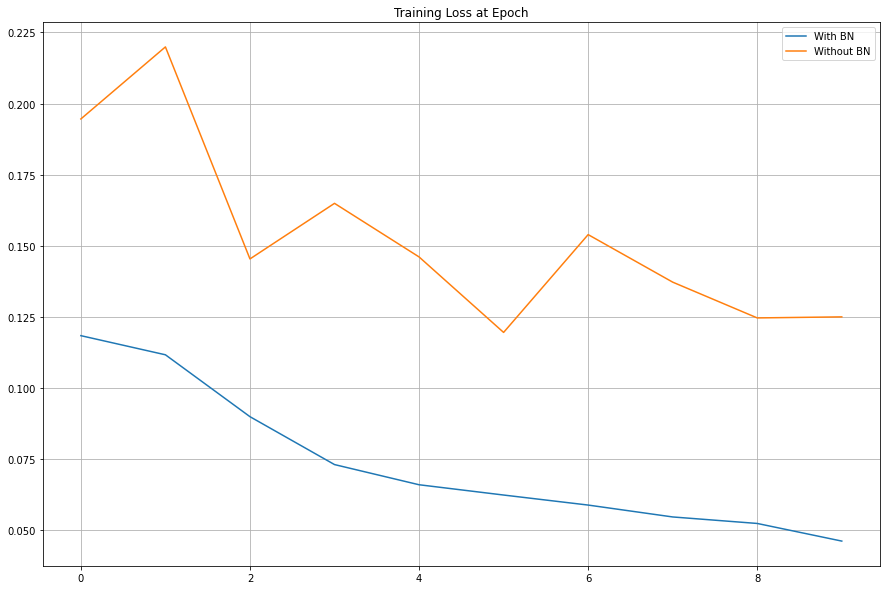

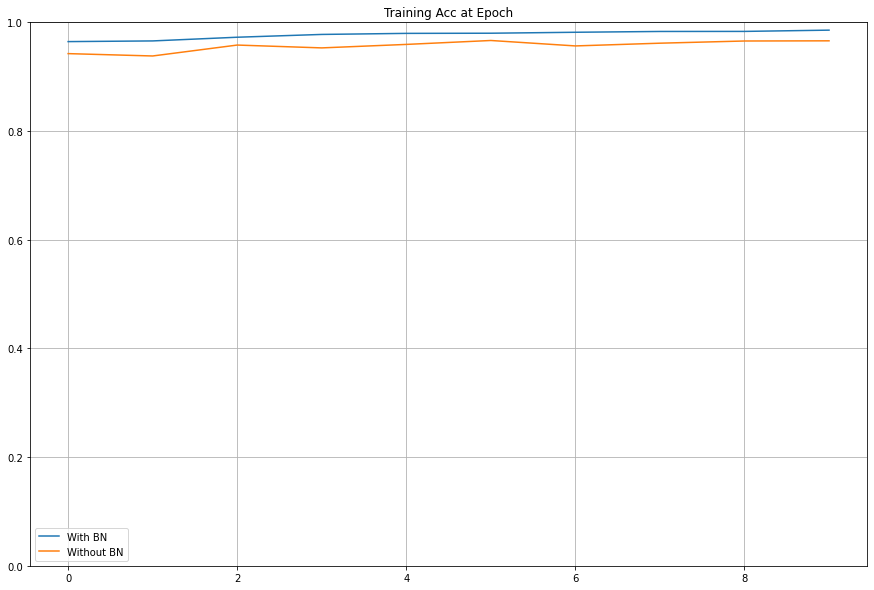

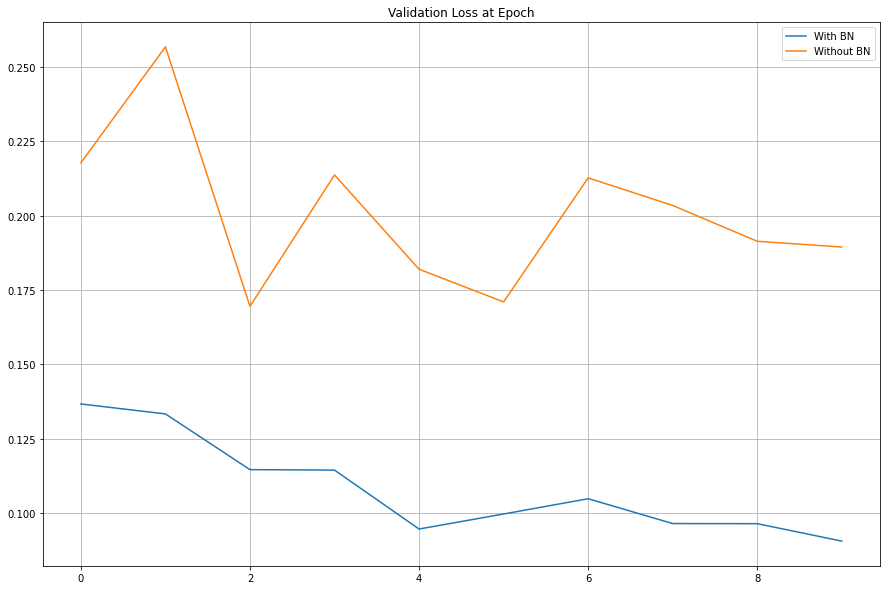

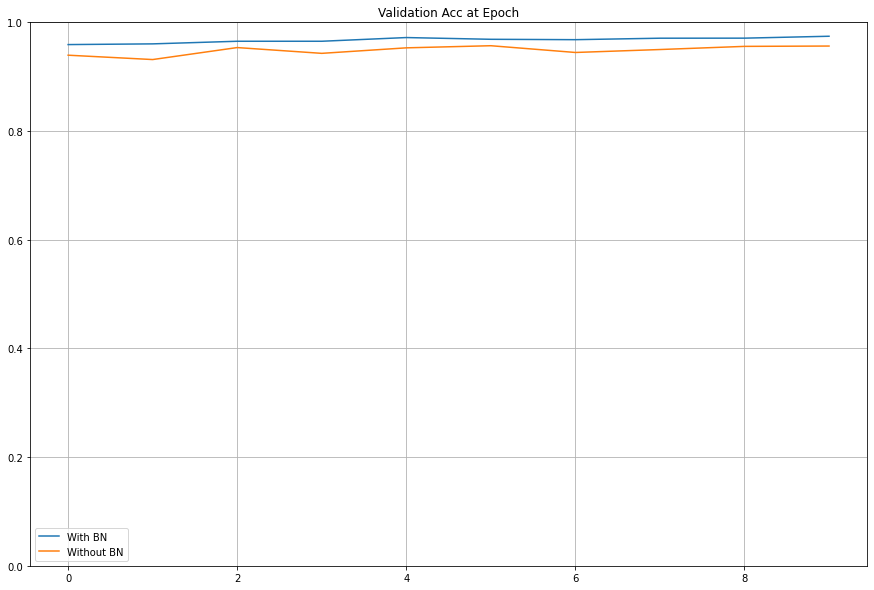

In [29]:
plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')